# Quantum Gates

In this notebook, we will aim to realise the following steps
- To observe qubits behaivours with basic gate operations
- Visualization with state vectors
- Intuitive understanding with Bloch's sphere

## Hadamard Gate

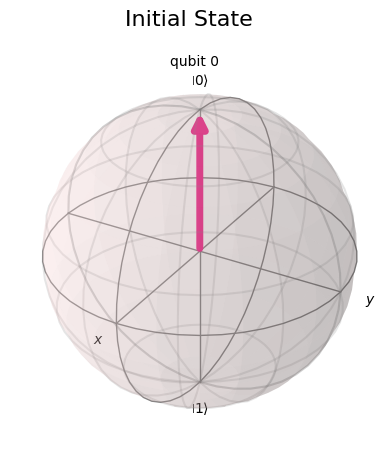

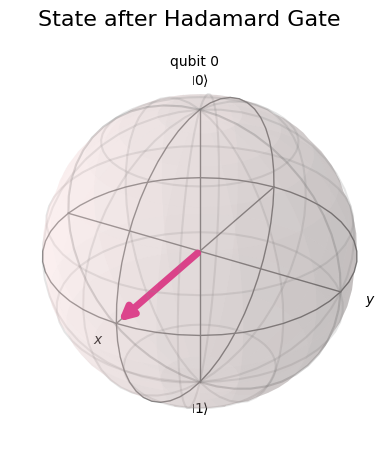

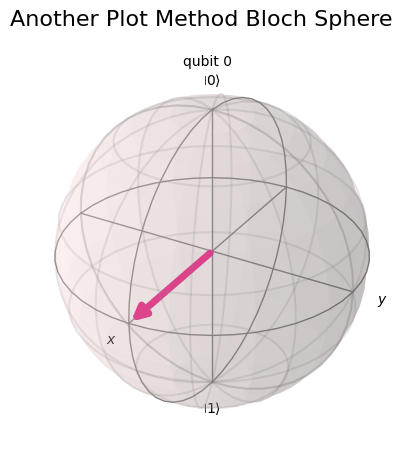

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline
import matplotlib.pyplot as plt

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)
#initial state of the circuit
state_ini = Statevector(qc)
# Apply a Hadamard gate to create a superposition state
qc.h(0)

# Get the statevector of the circuit
state = Statevector(qc)

# Plot the Bloch sphere representation of the state
plot_bloch_multivector(state_ini, title='Initial State')
# Plot the Bloch sphere representation of the state after applying Hadamard gate
plot_bloch_multivector(state, title='State after Hadamard Gate')
# There is an another way to plot the Bloch sphere using the draw method which uses plot_bloch_multivector in the background
bloch_fig = state.draw('bloch',title='Another Plot Method Bloch Sphere')
# Show the plot
plt.show()



The qubit is equal to $|0⟩$ before applying the Hadamard gate. Hadamard makes the qubit state is:
$$ 
|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)
$$

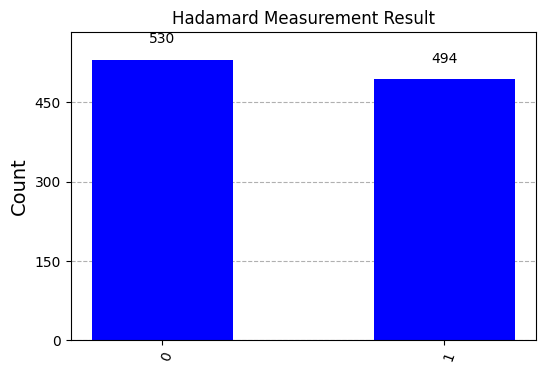

In [3]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)
# Apply a Hadamard gate to create a superposition state
qc.h(0)
# Measure the qubit and store the result in the classical bit
qc.measure(0,0)

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()

# Get the counts
counts = result.get_counts(qc)

# Plot the results with a histogram
plot_histogram(counts, color=['blue', 'red'],  # special colors
               title='Hadamard Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_histogram.svg')  # export to SVG
# Show the plot
plt.show()

## Hadamard gate + Z gate

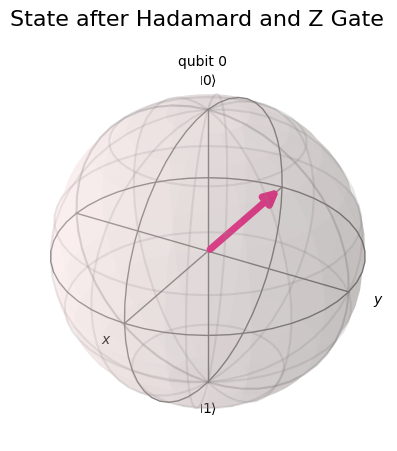

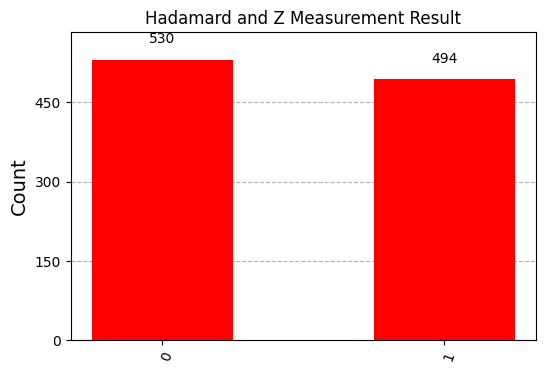

In [4]:
qc_hz = QuantumCircuit(1,1)
qc_hz.h(0)  # Apply Hadamard gate
qc_hz.z(0)  # Apply Z gate

state = Statevector(qc_hz)

# Measure the qubit and store the result in the classical bit
qc_hz.measure(0,0)

# Plot the Bloch sphere representation of the state after applying Hadamard and Z gate
plot_bloch_multivector(state, title='State after Hadamard and Z Gate')

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc_hz, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()
# Get the counts
counts = result.get_counts(qc_hz)
# Plot the results with a histogram
plot_histogram(counts, color=['red'],  # special colors
               title='Hadamard and Z Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_z_histogram.svg')  # export to SVG
# Show the plot
plt.show()


After Hadamard and Z gate are applied, the qubit state is:
$$ 
|-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)
$$

## Hadamard and X Gate

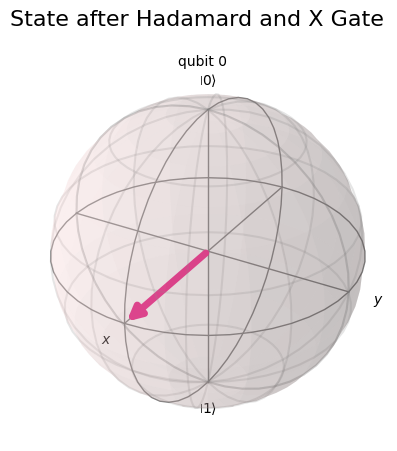

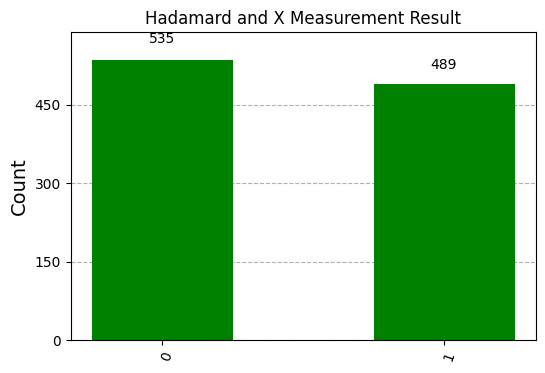

In [5]:
qc_hx = QuantumCircuit(1,1)
qc_hx.h(0)  # Apply Hadamard gate: |0> -> |+>
qc_hx.x(0)  # Apply X gate: |+> -> |->

state = Statevector(qc_hx)
# Measure the qubit and store the result in the classical bit
qc_hx.measure(0,0)

# Plot the Bloch sphere representation of the state after applying Hadamard and X gate
plot_bloch_multivector(state, title='State after Hadamard and X Gate')

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc_hx, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()
# Get the counts
counts = result.get_counts(qc_hx)
# Plot the results with a histogram
plot_histogram(counts, color=['green'],  # special colors
               title='Hadamard and X Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_x_histogram.svg')  # export to SVG
# Show the plot
plt.show()



## Twice Hadamard H + H

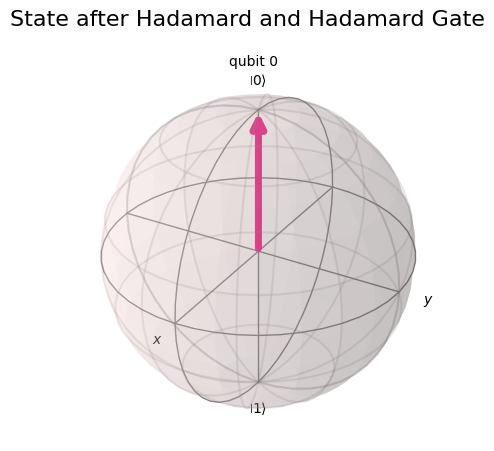

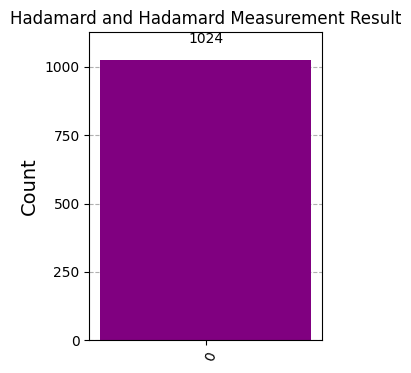

In [6]:
qc_hh = QuantumCircuit(1,1)
qc_hh.h(0)  # Apply Hadamard gate: |0> -> |+>
qc_hh.h(0)  # Apply Hadamard gate again: |+> -> |0>

state = Statevector(qc_hh)
# Measure the qubit and store the result in the classical bit
qc_hh.measure(0,0)
# Plot the Bloch sphere representation of the state after applying Hadamard and Hadamard gate
plot_bloch_multivector(state, title='State after Hadamard and Hadamard Gate')
# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc_hh, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()
# Get the counts
counts = result.get_counts(qc_hh)
# Plot the results with a histogram
plot_histogram(counts, color=['purple'],  # special colors
               title='Hadamard and Hadamard Measurement Result',
               figsize=(3,4),
               filename='images/hadamard_had_histogram.svg')  # export to SVG
# Show the plot
plt.show()


##  Bell states and their Amplitude Representations with CNOT Gate

In this section, we visualize the four Bell states using their density matrices.

Bell states are maximally entangled 2-qubit states. Each has unique phase and amplitude patterns that can be analyzed using the density matrix:
\[
\rho = |\psi⟩⟨\psi|
\]

---

###  1. Bell State |Φ⁺⟩

$$
|\Phi^+⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)
$$

- **Diagonal elements** (|00⟩⟨00| and |11⟩⟨11|): show equal probability for `|00⟩` and `|11⟩`
- **Off-diagonal elements** (|00⟩⟨11| and |11⟩⟨00|): indicate perfect coherence and entanglement
- **All amplitudes are real** → imaginary part of the matrix is zero

---

###  2. Bell State |Φ⁻⟩

$$
|\Phi^-⟩ = \frac{1}{\sqrt{2}}(|00⟩ - |11⟩)
$$

- Same magnitude as `|Φ⁺⟩`, but a **phase shift of π (−1)** on `|11⟩`
- Density matrix still shows entanglement: non-zero off-diagonal elements
- One off-diagonal entry flips sign → shows up as **negative real part**

---

###  3. Bell State |Ψ⁺⟩

$$
|\Psi^+⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |10⟩)
$$

- Represents superposition of bit-flipped states
- Diagonal: `|01⟩⟨01|` and `|10⟩⟨10|`
- Off-diagonal: `|01⟩⟨10|` and `|10⟩⟨01|` → coherence between these two

---

###  4. Bell State |Ψ⁻⟩

$$
|\Psi^-⟩ = \frac{1}{\sqrt{2}}(|01⟩ - |10⟩)
$$

- Phase difference between `|01⟩` and `|10⟩`
- One off-diagonal term is negative → seen in the real or imaginary part depending on implementation
- Strong signature of quantum correlation

---

###  Summary

- All Bell states have:
  - **Two non-zero diagonal elements** (equal probability basis states)
  - **Two significant off-diagonal elements** (entanglement indicator)
- **Visualizing density matrices** helps interpret:
  - Population (diagonal)
  - Quantum coherence (off-diagonal)
  - Phase (signs and imaginary parts)

> Use `plot_state_city()` to compare these matrices side-by-side for a deeper understanding of how quantum information is stored in entangled states.



|Φ⁺⟩ = (|00⟩ + |11⟩) / √2
[0.70710678+0.j,0.        +0.j,0.        +0.j,0.70710678+0.j]



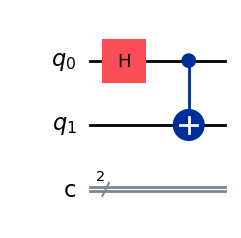

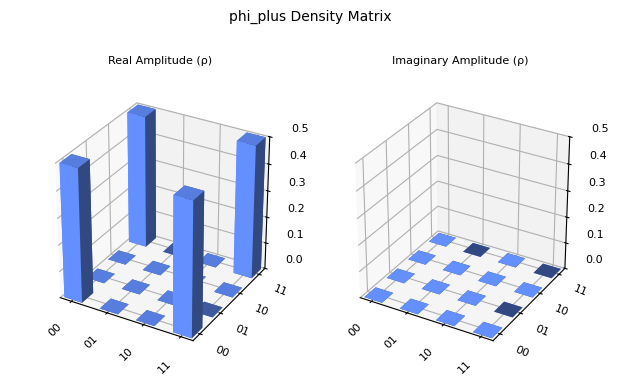

|Φ⁻⟩ = (|00⟩ - |11⟩) / √2
[ 0.70710678+0.j,-0.        +0.j, 0.        +0.j,-0.70710678+0.j]



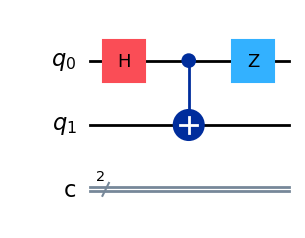

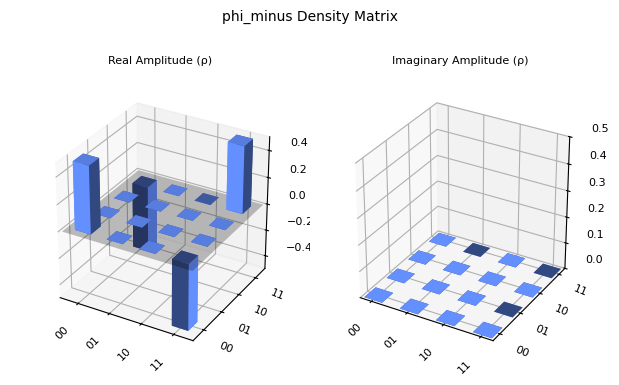

|Ψ⁺⟩ = (|01⟩ + |10⟩) / √2
[0.        +0.j,0.70710678+0.j,0.70710678+0.j,0.        +0.j]



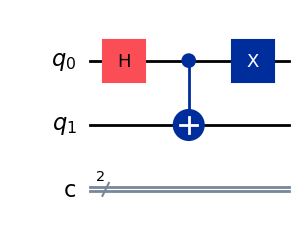

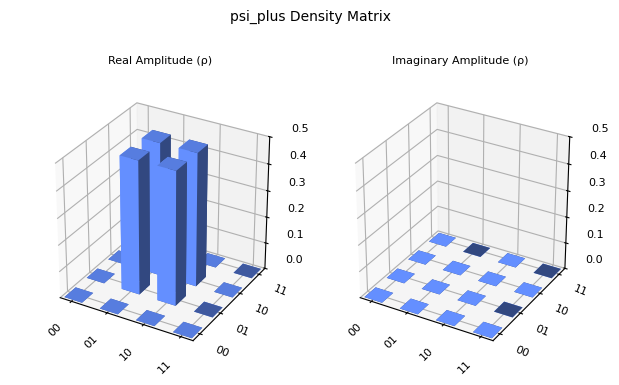

|Ψ⁻⟩ = (|01⟩ - |10⟩) / √2
[ 0.        +0.j,-0.70710678+0.j, 0.70710678+0.j,-0.        +0.j]



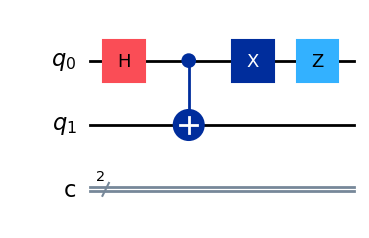

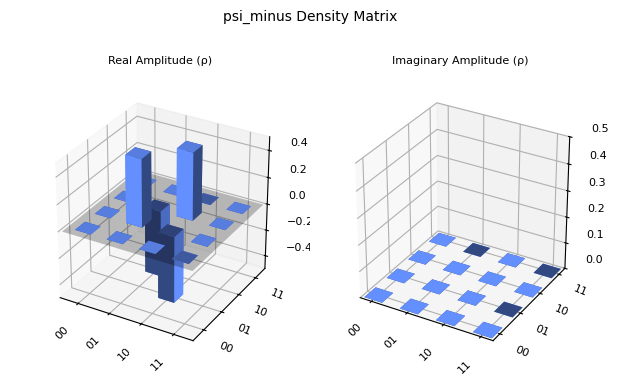

In [7]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# define a function to create Bell states
def create_bell_state(name):
    qc_entangled = QuantumCircuit(2,2)
    qc_entangled.h(0)  # Apply Hadamard gate to the first qubit
    qc_entangled.cx(0, 1)  # Apply CNOT gate to entangle the qubits phi_plus state
    
    if name == 'phi_minus':
        qc_entangled.z(0)   # Apply Z gate to create |phi-> state
    elif name == 'psi_plus':
        qc_entangled.x(0)  # Apply X gate to create |psi+> state
    elif name == 'psi_minus':
        qc_entangled.x(0)   
        qc_entangled.z(0)   
    
    return qc_entangled

# List of Bell states
bell_states = {
    "phi_plus": "|Φ⁺⟩ = (|00⟩ + |11⟩) / √2",
    "phi_minus": "|Φ⁻⟩ = (|00⟩ - |11⟩) / √2",
    "psi_plus": "|Ψ⁺⟩ = (|01⟩ + |10⟩) / √2",
    "psi_minus": "|Ψ⁻⟩ = (|01⟩ - |10⟩) / √2"
}

# Create and visualize each Bell state
for label, desc in bell_states.items():
    qc_entangled = create_bell_state(label)
    qc_entangled.draw('mpl')
    state = Statevector(qc_entangled)
    rho = DensityMatrix(state)
    print(f"{desc}\n{state.draw('text')}\n")
    plot_state_city(rho, title=f'{label} Density Matrix', figsize=(6,4))
    plt.show()
# Show the plot

    

## Analysis of Y,S,T gate effects on the superposition qubit

[0.-0.70710678j,0.+0.70710678j]

[0.70710678+0.j        ,0.        +0.70710678j]

[0.70710678+0.j ,0.5       +0.5j]



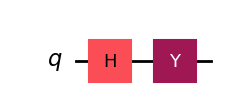

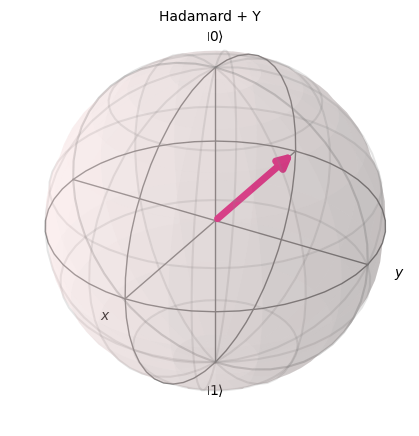

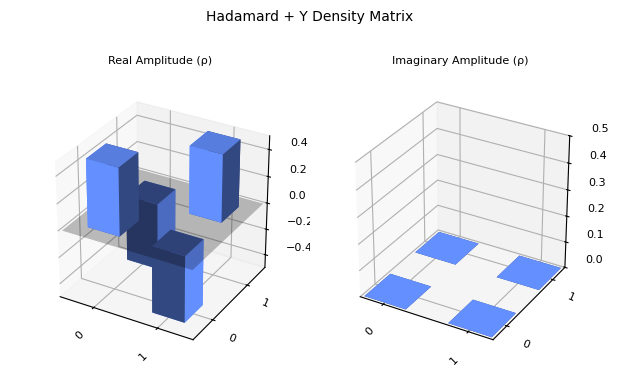

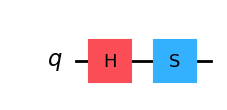

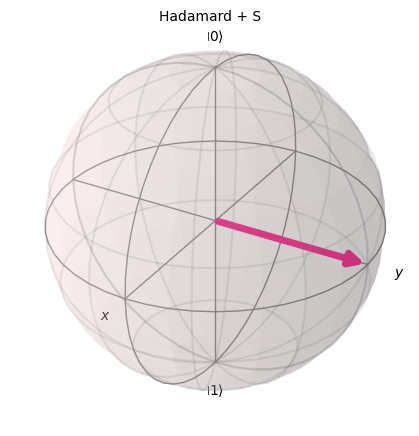

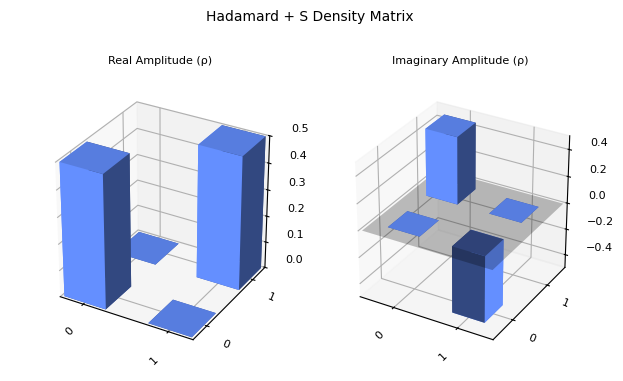

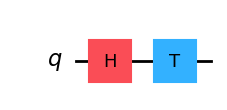

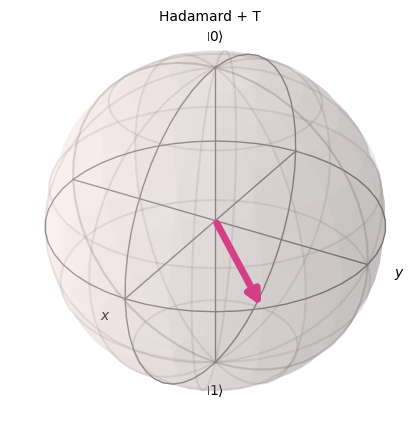

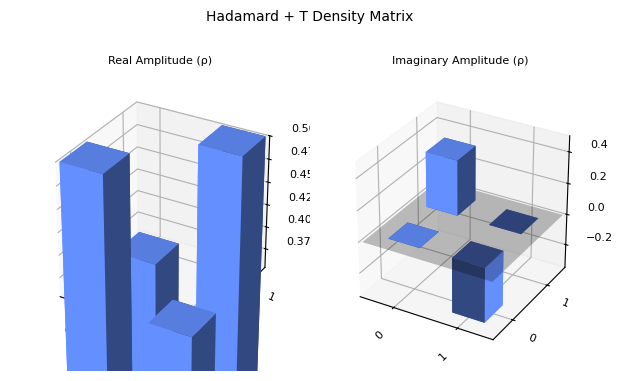

In [24]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import DensityMatrix, Pauli
import numpy as np

# Helper to apply gates and get Bloch vector
def bloch_after_gates(gates, label):
    qc = QuantumCircuit(1)
    qc.h(0)  # Superposition as initial state
    for gate in gates:
        getattr(qc, gate)(0)
    state = Statevector(qc)
    qc.draw('mpl')
    print(f"{state.draw('text')}\n")
    return DensityMatrix(state), label
# Gate sets
experiments = [
    (['y'], "Hadamard + Y"),
    (['s'], "Hadamard + S"),
    (['t'], "Hadamard + T")
]

def density_matrix_to_bloch(dm: DensityMatrix) -> np.ndarray:
    """Calculate Bloch vector (x, y, z) from a 1-qubit density matrix."""
    paulis = [Pauli('X'), Pauli('Y'), Pauli('Z')]
    bloch = np.array([np.real(dm.expectation_value(p)) for p in paulis])
    return bloch

# Plot results
for i, (gates, label) in enumerate(experiments):
    dm, title = bloch_after_gates(gates, label)
    bloch = density_matrix_to_bloch(dm)
    plot_bloch_vector(bloch, title=title, figsize=(6,4))
    plot_state_city(dm, title=f'{label} Density Matrix', figsize=(6,4))

plt.show()